In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
col_names = ['Tx Count', 'Rx Count', 'Loss', 'Load', 'Offered Load', 'Throughput']

df_csma = pd.read_csv('results/CSMA.csv',names=col_names, header=0)
df_aloha = pd.read_csv('results/ALOHA.csv',names=col_names, header=0)
df_sfama = pd.read_csv('results/SFAMA.csv',names=col_names, header=0)


df_csma2 = pd.read_csv('results/CSMA2.csv',names=col_names, header=0)
df_aloha2 = pd.read_csv('results/ALOHA2.csv',names=col_names, header=0)
df_sfama2 = pd.read_csv('results/SFAMA2.csv',names=col_names, header=0)

df_csma3 = pd.read_csv('results/CSMA3.csv',names=col_names, header=0)
df_aloha3 = pd.read_csv('results/ALOHA3.csv',names=col_names, header=0)
df_sfama3 = pd.read_csv('results/SFAMA3.csv',names=col_names, header=0)

x_plot = col_names[3]
y_plot = col_names[2]


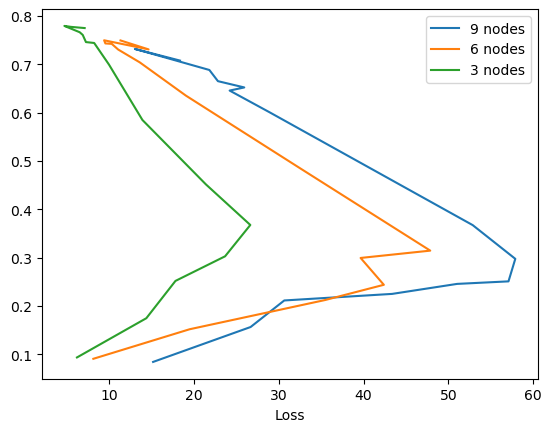

In [3]:
ax_csma = df_csma.plot(x=x_plot, y=y_plot)
df_csma2.plot(ax=ax_csma, x=x_plot, y=y_plot)
df_csma3.plot(ax=ax_csma, x=x_plot, y=y_plot)
ax_csma.legend(["9 nodes", "6 nodes", "3 nodes"])

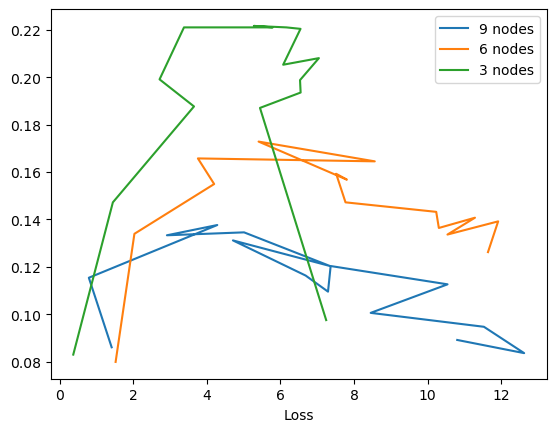

In [4]:
ax_aloha = df_aloha.plot(x=x_plot, y=y_plot)
df_aloha2.plot(ax=ax_aloha, x=x_plot, y=y_plot)
df_aloha3.plot(ax=ax_aloha, x=x_plot, y=y_plot)
ax_aloha.legend(["9 nodes", "6 nodes", "3 nodes"])

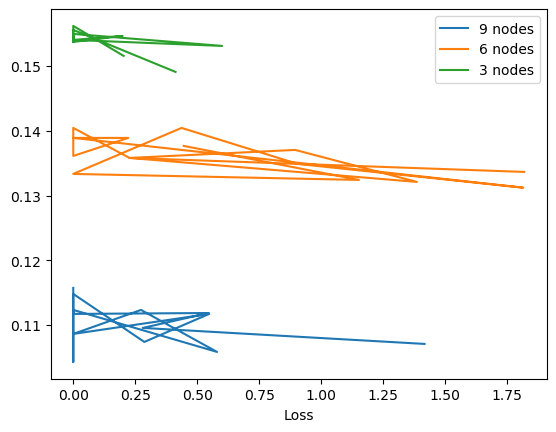

In [5]:
ax_sfama = df_sfama.plot(x=x_plot, y=y_plot)
df_sfama2.plot(ax=ax_sfama, x=x_plot, y=y_plot)
df_sfama3.plot(ax=ax_sfama, x=x_plot, y=y_plot)
ax_sfama.legend(["9 nodes", "6 nodes", "3 nodes"])

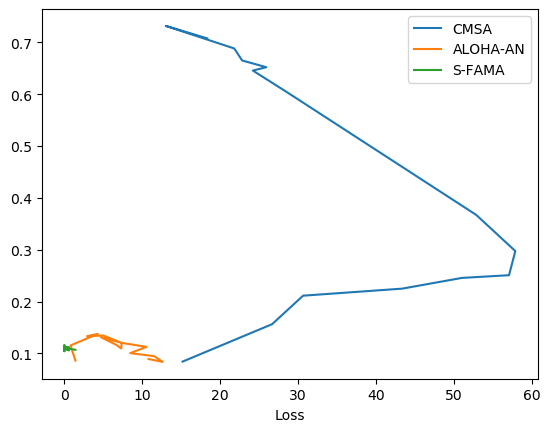

In [6]:
ax_9 = df_csma.plot(x=x_plot, y=y_plot)
df_aloha.plot(ax=ax_9, x=x_plot, y=y_plot)
df_sfama.plot(ax=ax_9, x=x_plot, y=y_plot)
ax_9.legend(["CMSA", "ALOHA-AN", "S-FAMA"])

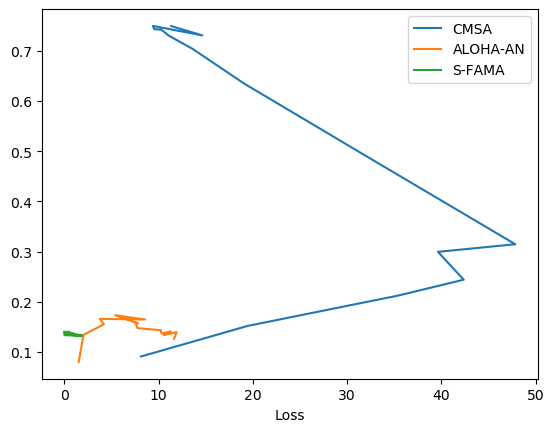

In [7]:
ax_6 = df_csma2.plot(x=x_plot, y=y_plot)
df_aloha2.plot(ax=ax_6, x=x_plot, y=y_plot)
df_sfama2.plot(ax=ax_6, x=x_plot, y=y_plot)
ax_6.legend(["CMSA", "ALOHA-AN", "S-FAMA"])

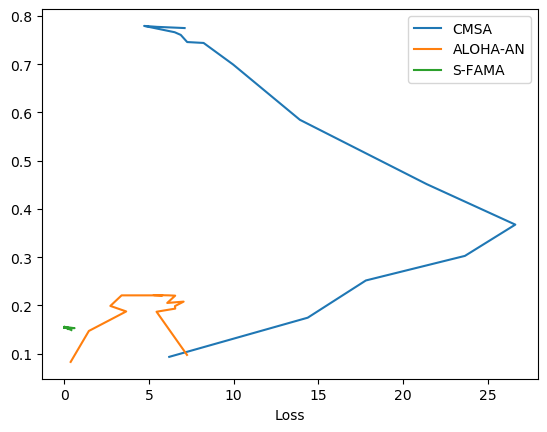

In [8]:
ax_3 = df_csma3.plot(x=x_plot, y=y_plot)
df_aloha3.plot(ax=ax_3, x=x_plot, y=y_plot)
df_sfama3.plot(ax=ax_3, x=x_plot, y=y_plot)
ax_3.legend(["CMSA", "ALOHA-AN", "S-FAMA"])